In [11]:
%matplotlib inline
import tables
import numpy
import os
import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib

import glob
import sys
import matplotlib.gridspec as gridspec
import CalculateMeanWinds

import imageio

In [12]:
def MakeCircle(rPixels,x0,y0):
#     rPixels = 400.
    theta = numpy.linspace(0,2.*numpy.pi,1000)
    x = x0+rPixels*numpy.cos(theta)
    y = y0+rPixels*numpy.sin(theta)
    return x,y

In [13]:
def MakeQuiverFigures(DecimalHours, ZonalWinds,MeridWinds,radius=0.5):
    # can now validate using testmltplots.ipynb
#     timeInDegrees = 180-360.*(DecimalHours/24.)
#     print 'timeInDegrees', DecimalHours,timeInDegrees
#     timeInDegrees = 270.-360.*(DecimalHours/24.)
    timeInDegrees = 90.-(360./24.)*DecimalHours
    timeInDegrees = timeInDegrees+15.
    theta = numpy.deg2rad(timeInDegrees)
    radii = numpy.ones(theta.shape[0])*radius
    Ue = ZonalWinds
    Un = MeridWinds
    #test
    # Vin = 0.0
    # Uin = 1.0
    Ux = -numpy.cos(theta)*Un + numpy.sin(theta)*Ue
    Uy = numpy.sin(theta)*Un + numpy.cos(theta)*Ue




    # plt.show()
    return theta,radii, Ux, Uy

In [14]:
def MakePFISRPlot(TmpDict,FileID):
    
    Lat = numpy.array([80,70,60,50])
    Radius = numpy.array([185,379,560,747])
    p = numpy.polyfit(Lat,Radius,deg=1)
    
    
    
    KeySelect = 'slt'
    ikey = TmpDict.keys()
    print ikey
    mltTimeDict = TmpDict[ikey[0]]['slt']
    ialt = 8
    year = ikey[0][0:4]
    print ikey[0]
    print mltTimeDict.keys()
    print mltTimeDict['MeanAltitude']
    print '\n \n'
    print 'Altitude Selected', mltTimeDict['MeanAltitude'][ialt]
    print '\n \n'
    # theta,radii,Vprime,Uprime = MakeQuiverFigures(mltTimeDict['DecimalHoursTimeGrid'], \
    #                                                           mltTimeDict['MeanZonalWinds'][0,:,ialt],\
    #                                                           mltTimeDict['MeanMeridWinds'][0,:,ialt])

    n = mltTimeDict['DecimalHoursTimeGrid'].shape[0]
    ZonalWind = numpy.ones(n)*100.
    MeridionalWind = numpy.ones(n)#*100.
    theta,radii,Ux,Uy = MakeQuiverFigures(mltTimeDict['DecimalHoursTimeGrid'], \
                                                               ZonalWind,MeridionalWind)
    theta,radii,Ux,Uy = MakeQuiverFigures(mltTimeDict['DecimalHoursTimeGrid'], \
                                        mltTimeDict['MeanZonalWinds'][0,:,ialt],\
                                        mltTimeDict['MeanMeridWinds'][0,:,ialt])
    print mltTimeDict['DecimalHoursTimeGrid']
    timeInDegrees = 360.*(mltTimeDict['DecimalHoursTimeGrid']/24.)-90
    print timeInDegrees
    print theta
    
        # check the origin
    # original origin
    # x0 = 967
    # y0 = 1012

    x0 = 770.
    y0 = 1075.
    degTest = 65.34
    radius = p[1]+p[0]*degTest
    # theta,radii,Ux,Uy = MakeQuiverFigures(numpy.array([6]),numpy.array([100]),numpy.array([0]))
    xW = x0+radius*numpy.cos(theta)
    yW = y0+radius*numpy.sin(theta)
    plt.figure(figsize=(3,3), dpi=300)
    plt.imshow(im1)

    x68,y68 = MakeCircle(radius,x0,y0)
    # plt.plot(xW,yW,'b.')
    scale = 0.75
    Q = plt.quiver(xW, yW, Ux, Uy,color='red', pivot='tail',scale=scale,units='xy')
    plt.quiverkey(Q, 0.775, 0.95, 150, r'$150 \frac{m}{s}$', labelpos='E',fontproperties={'weight': 'bold', 'size':10})
    plt.plot(xW,yW, 'b-', lw=0.75)
    plt.plot(x0,y0, 'bs', lw=1)
    plt.plot([x0,x0],[y0,615], 'b-')
    plt.plot([x0,1225],[y0,y0], 'b-')
    
    plt.xticks([])
    plt.yticks([])
    # plt.text(100,100, 'PFISR June 2011', fontsize=16)
    plt.text(25,85, 'PFISR June %s'%year, fontsize=9, color='red')
    plt.text(25,1950, 'Plasma Forcing', fontsize=9)
    plt.text(1600,1950, r'124 km'+'\n'+'0000 UT', fontsize=9)
    plt.text(x0,615-50,'12 LT', fontsize=10,color='blue')
    plt.text(1225+300,y0-100., '06 LT', fontsize=10,color='blue')
    # plt.quiver(250,100, 250,0, color='red')
    # print 90-360.*(12/24.)
    plt.tight_layout()
#     plt.savefig('./Figures/LM1991_120km_PFISR%s_%s.pdf'%(year,FileID))
#     plt.close()
    return

In [15]:
# open Image
im1 = imageio.imread('./Mikkelsen_Larsen_1991/ML_Figure7_120km.png')

2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: ConfigReader class initialized
2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: ConfigReader class initialized
2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: No DEFAULT section found in ConfigFileForPaper_02212019.ini, ignoring...
2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: No DEFAULT section found in ConfigFileForPaper_02212019.ini, ignoring...
2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: 	[DATADISCARD]
2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: 	[DATADISCARD]
2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: 		ZonalWindMax : 500.0
2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: 		ZonalWindMax : 500.0
2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: 		ZonalWindMin : -500.0
2019-03-15 15:52:39 - tools.configreader.ConfigReader - DEBUG: 		ZonalWindMin : -500.0
2019-03-15 15:52:39 - tools.configread

fname /Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201106_Winds.v0.4.5.2018.11.20.h5
[   10    12    24 ... 86769 86770 86771]
nnan raw (array([   10,    12,    24, ..., 86769, 86770, 86771]),)
[nan nan nan ... nan nan nan]
[-5.70741558e+02  6.25952667e+01 -1.63914718e+01 ... -2.05719607e+02
 -4.89488523e-01  5.15462557e-01]
Total starting Data, 86772 86772
nUsableInital, nNan 74587.0 12185.0
alt, initial usable data 82.5 6141.0 (6198,)
alt, initial usable data 87.5 6141.0 (6198,)
alt, initial usable data 92.5 6141.0 (6198,)
alt, initial usable data 97.5 6141.0 (6198,)
alt, initial usable data 102.5 6141.0 (6198,)
alt, initial usable data 107.5 6141.0 (6198,)
alt, initial usable data 112.5 6141.0 (6198,)
alt, initial usable data 117.5 6141.0 (6198,)
alt, initial usable data 122.5 6141.0 (6198,)
alt, initial usable data 127.5 6141.0 (6198,)
alt, initial usable data 132.5 895.0 (6198,)
alt, initial usable data 137.5 6141

[     0      1      2 ... 114181 114182 114183]
nnan raw (array([     0,      1,      2, ..., 114181, 114182, 114183]),)
[nan nan nan ... nan nan nan]
[1346.65101739  200.97800238   12.63967759 ...    0.            0.
    0.        ]
Total starting Data, 114184 114184
nUsableInital, nNan 100284.0 13900.0
alt, initial usable data 82.5 8131.0 (8156,)
alt, initial usable data 87.5 8131.0 (8156,)
alt, initial usable data 92.5 8131.0 (8156,)
alt, initial usable data 97.5 8131.0 (8156,)
alt, initial usable data 102.5 8131.0 (8156,)
alt, initial usable data 107.5 8131.0 (8156,)
alt, initial usable data 112.5 8131.0 (8156,)
alt, initial usable data 117.5 8131.0 (8156,)
alt, initial usable data 122.5 8131.0 (8156,)
alt, initial usable data 127.5 8131.0 (8156,)
alt, initial usable data 132.5 1356.0 (8156,)
alt, initial usable data 137.5 8131.0 (8156,)
alt, initial usable data 142.5 1356.0 (8156,)
alt, initial usable data 147.5 8131.0 (8156,)
initial nTotal check nUsable+nNan, nTot 114184.0 11418

[  2936   2938   2950 ... 107377 107378 107379]
nnan raw (array([  2936,   2938,   2950, ..., 107377, 107378, 107379]),)
[nan nan nan ... nan nan nan]
[ 5.11934766e+02  1.02820962e+03 -4.65766881e+02 ...  1.30505317e+01
 -1.36823326e-02 -5.68517695e-05]
Total starting Data, 107380 107380
nUsableInital, nNan 96796.0 10584.0
alt, initial usable data 82.5 7668.0 (7670,)
alt, initial usable data 87.5 7668.0 (7670,)
alt, initial usable data 92.5 7668.0 (7670,)
alt, initial usable data 97.5 7668.0 (7670,)
alt, initial usable data 102.5 7668.0 (7670,)
alt, initial usable data 107.5 7668.0 (7670,)
alt, initial usable data 112.5 7668.0 (7670,)
alt, initial usable data 117.5 7668.0 (7670,)
alt, initial usable data 122.5 7668.0 (7670,)
alt, initial usable data 127.5 7668.0 (7670,)
alt, initial usable data 132.5 2390.0 (7670,)
alt, initial usable data 137.5 7668.0 (7670,)
alt, initial usable data 142.5 2390.0 (7670,)
alt, initial usable data 147.5 7668.0 (7670,)
initial nTotal check nUsable+nNan, 

[    10     12     24 ... 168417 168418 168419]
nnan raw (array([    10,     12,     24, ..., 168417, 168418, 168419]),)
[nan nan nan ... nan nan nan]
[-5.75087514e+01  0.00000000e+00  0.00000000e+00 ... -9.86015603e+00
  1.72665191e-05  0.00000000e+00]
Total starting Data, 168420 168420
nUsableInital, nNan 149962.0 18458.0
alt, initial usable data 82.5 12029.0 (12030,)
alt, initial usable data 87.5 12029.0 (12030,)
alt, initial usable data 92.5 12029.0 (12030,)
alt, initial usable data 97.5 12029.0 (12030,)
alt, initial usable data 102.5 12029.0 (12030,)
alt, initial usable data 107.5 12029.0 (12030,)
alt, initial usable data 112.5 12029.0 (12030,)
alt, initial usable data 117.5 12029.0 (12030,)
alt, initial usable data 122.5 12029.0 (12030,)
alt, initial usable data 127.5 12029.0 (12030,)
alt, initial usable data 132.5 2807.0 (12030,)
alt, initial usable data 137.5 12029.0 (12030,)
alt, initial usable data 142.5 2807.0 (12030,)
alt, initial usable data 147.5 12029.0 (12030,)
initial 

/Users/srkaeppler/Env/EregWinds/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:908: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


['201706']
201706
['MeanMeridFlow', 'F107Raw', 'StdMeridFlow', 'MeanZonalE', 'AERaw', 'MeanMeridWinds', 'ZonalWindsRaw', 'NArrZonalWinds', 'ZonalE', 'StdZonalFlow', 'StdMeridWinds', 'MeanZonalWinds', 'MeanAltitude', 'APRaw', 'NarrMeridFlow', 'KPRaw', 'DecimalHoursTimeGrid', 'MeridWindsRaw', 'MeanMeridE', 'NArrZonalFlow', 'NeMeanRaw', 'MeridE', 'MeanZonalFlow', 'NarrMeridWinds', 'StdZonalWinds']
[ 82.5  87.5  92.5  97.5 102.5 107.5 112.5 117.5 122.5 127.5 132.5 137.5
 142.5 147.5]

 

Altitude Selected 122.5

 

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19

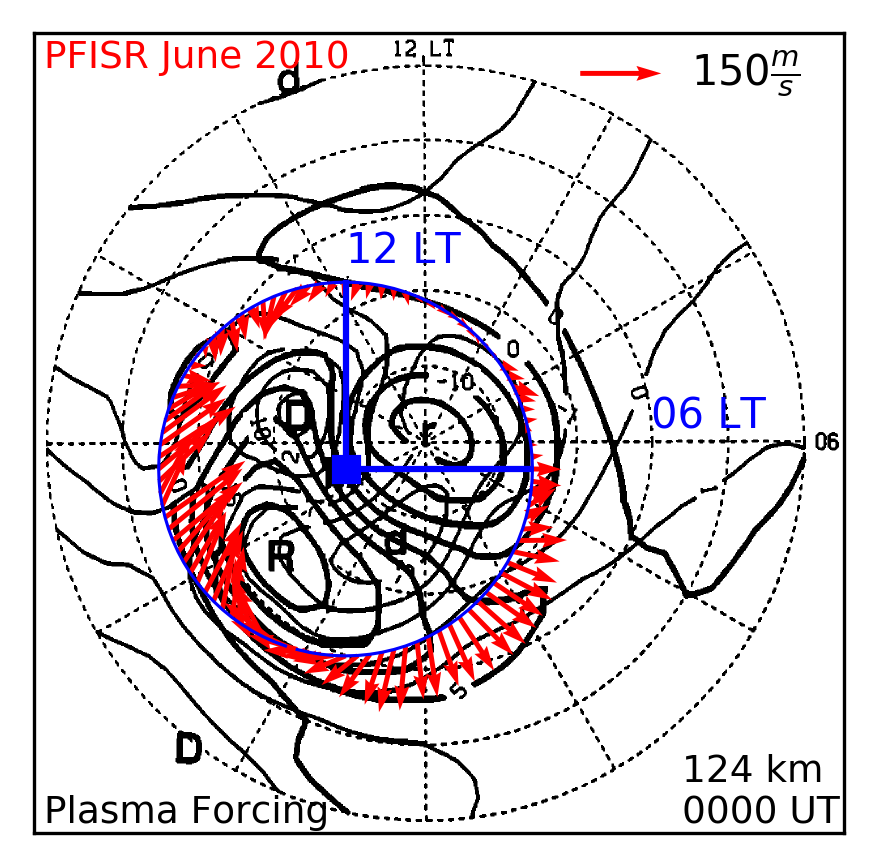

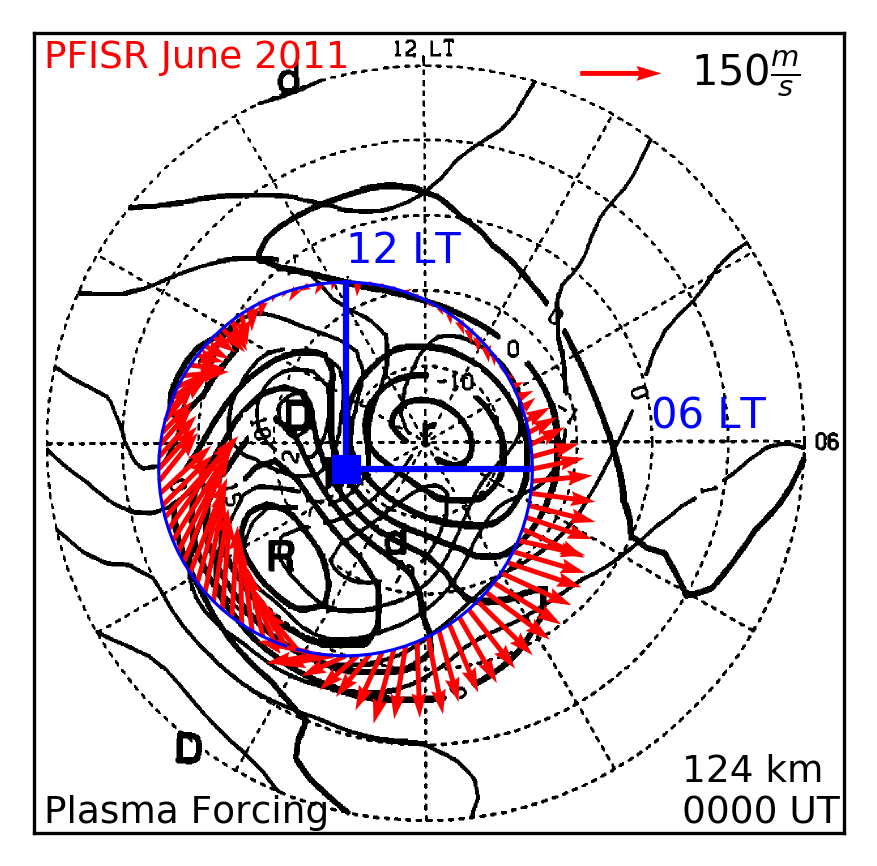

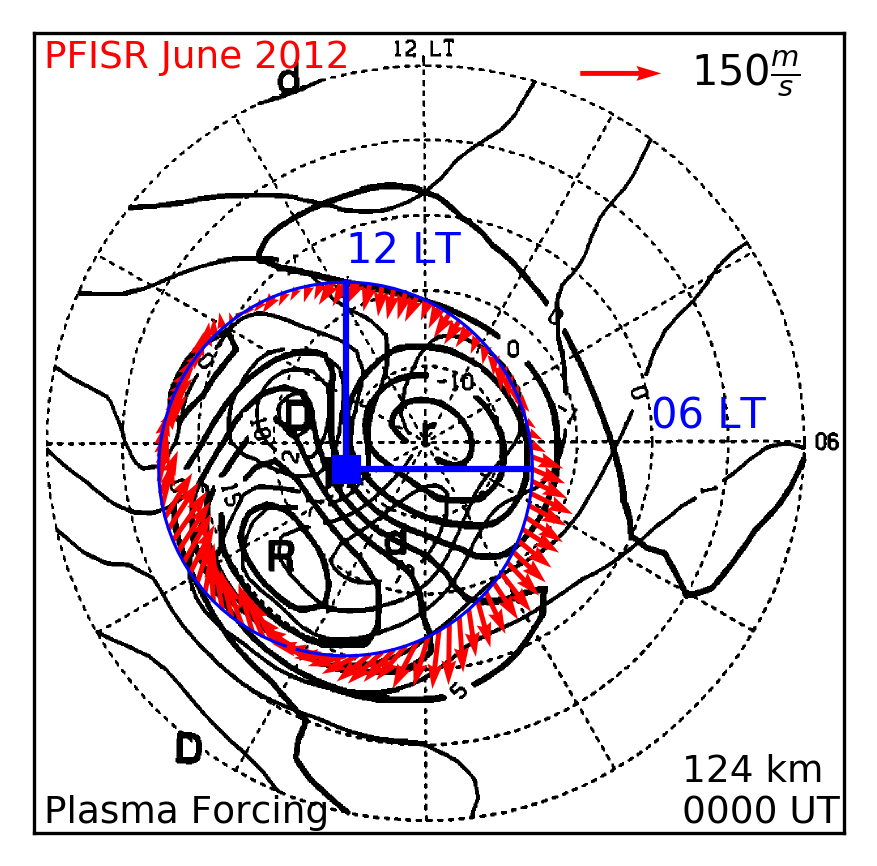

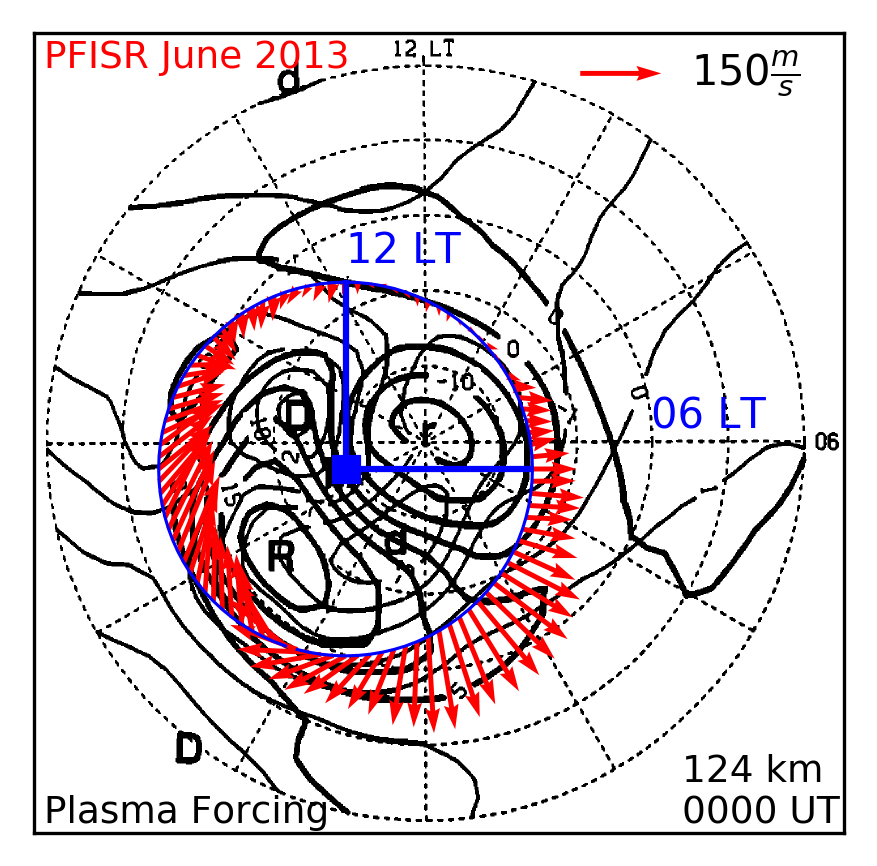

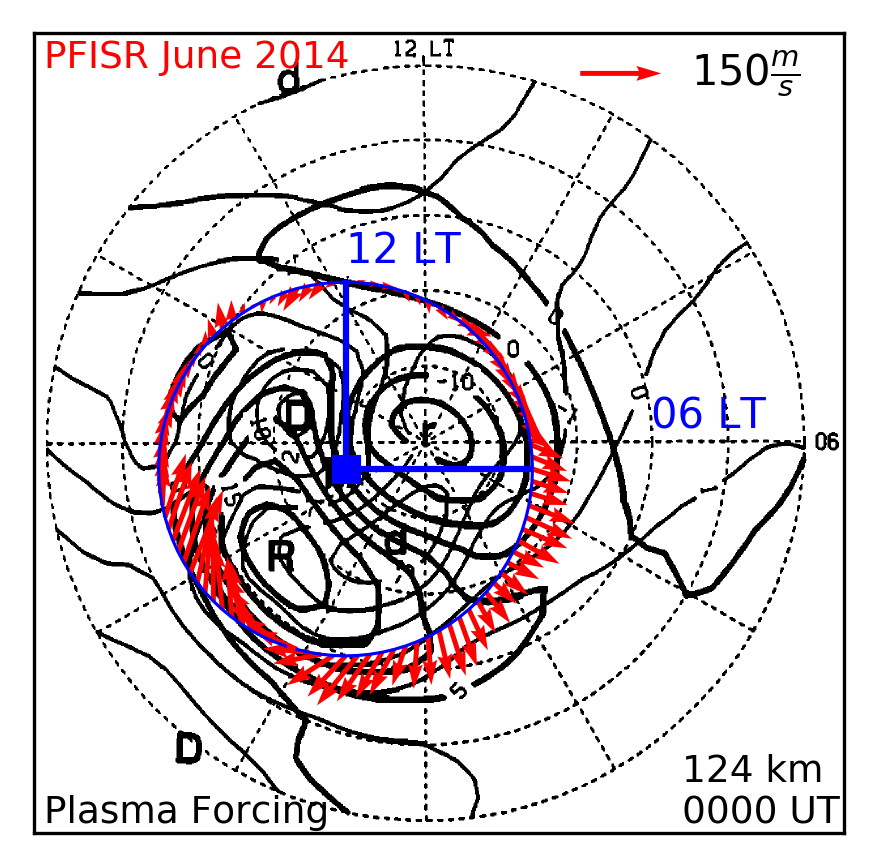

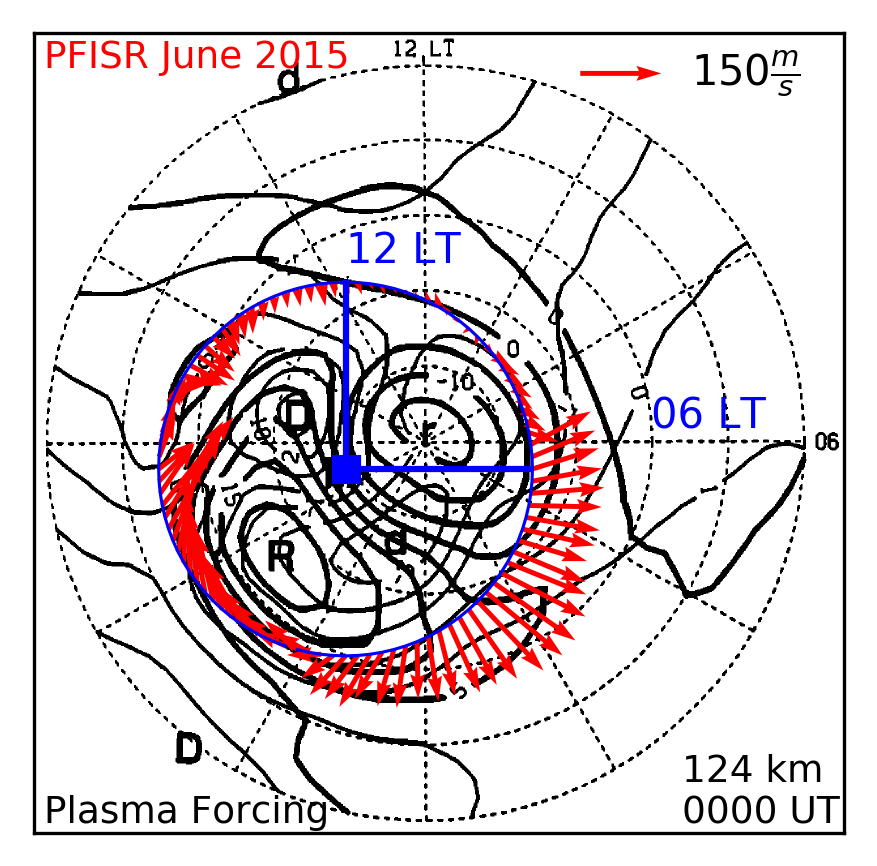

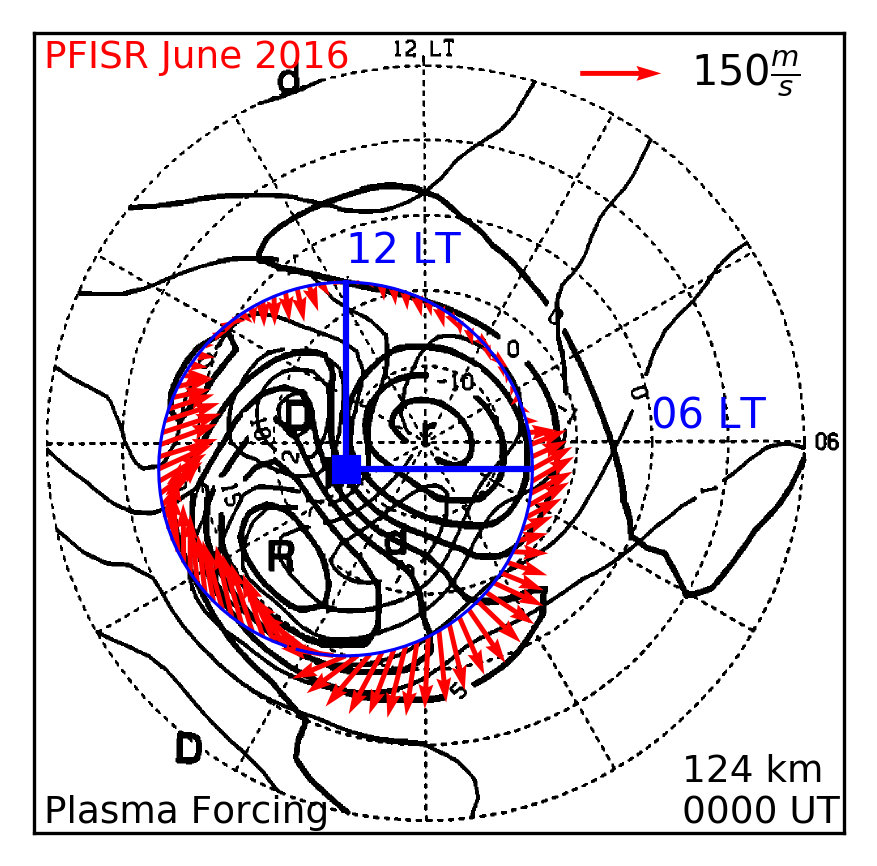

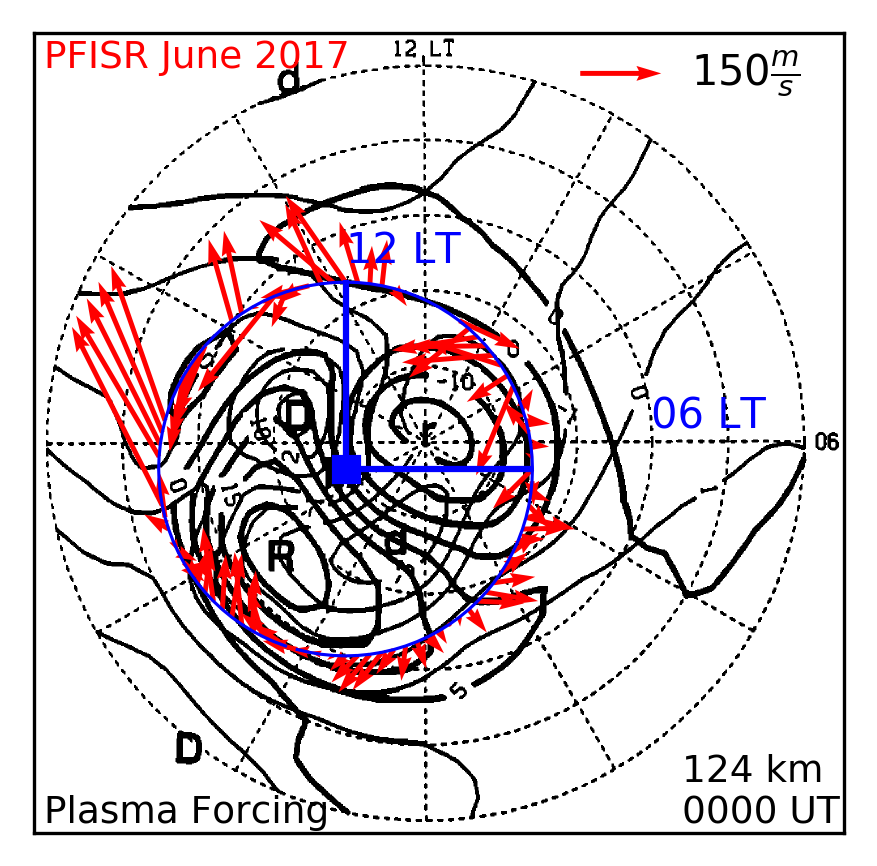

In [16]:



#configuration file
configfile = 'ConfigFileForPaper_02212019.ini'

CalcMeanWinds = CalculateMeanWinds.CalculateMeanWinds(configfile)
# TmpDict = CalcMeanWinds.main(fnames)
# KeySelect = 'mlt'
# PlotWindsVYear(TmpDict,'mlt',[7,5,4],'PFISR_2008_2011_WindsV3Altitudes.10092018.png')

# fnames = ['/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.2.2018.10.15/MonthlyWinds/201106_Winds.v0.4.2.2018.10.15.h5'
#         ]
fnames = ['/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201006_Winds.v0.4.5.2018.11.20.h5',
          '/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201106_Winds.v0.4.5.2018.11.20.h5',
          '/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201206_Winds.v0.4.5.2018.11.20.h5',
          '/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201306_Winds.v0.4.5.2018.11.20.h5',
          '/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201406_Winds.v0.4.5.2018.11.20.h5',
          '/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201506_Winds.v0.4.5.2018.11.20.h5',
          '/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201606_Winds.v0.4.5.2018.11.20.h5',
          '/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201706_Winds.v0.4.5.2018.11.20.h5']

for ifile in fnames:
    TmpDict = CalcMeanWinds.main([ifile])
    MakePFISRPlot(TmpDict,'02212019')